<a href="https://colab.research.google.com/github/Naveen1603/RAG-dataClassification/blob/main/DataClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install chromadb --quiet
!pip install transformers --quiet
!pip install tika --quiet
!pip install langchain --quiet
!pip install langchain_community --quiet
!pip install sentence_transformers --quiet
!pip install langchain_huggingface --quiet
!pip install gpt4all --quiet
# !pip install pandas --quiet
# !pip install torch --quiet
# !pip install numpy --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.8/29.8 MB 39.2 MB/s eta 0:00:00


In [ ]:
import tika
from tika import parser
text = parser.from_file(r'/content/Information Classification Level (2).pdf')

2024-08-11 15:29:32,315 [MainThread  ] [INFO ]  Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server-standard/2.6.0/tika-server-standard-2.6.0.jar to /tmp/tika-server.jar.
INFO:tika.tika:Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server-standard/2.6.0/tika-server-standard-2.6.0.jar to /tmp/tika-server.jar.
2024-08-11 15:29:32,774 [MainThread  ] [INFO ]  Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server-standard/2.6.0/tika-server-standard-2.6.0.jar.md5 to /tmp/tika-server.jar.md5.
INFO:tika.tika:Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server-standard/2.6.0/tika-server-standard-2.6.0.jar.md5 to /tmp/tika-server.jar.md5.
2024-08-11 15:29:33,173 [MainThread  ] [WARNI]  Failed to see startup log message; retrying...
2024-08-11 15:29:38,188 [MainThread  ] [WARNI]  Failed to see startup log message; retrying...


In [ ]:
from langchain.text_splitter import CharacterTextSplitter
text_splitter = CharacterTextSplitter(chunk_size=1000, chunk_overlap=200)
chunks = text_splitter.create_documents([text["content"]])

In [ ]:
from langchain.embeddings import HuggingFaceEmbeddings
embeddings_model = HuggingFaceEmbeddings(
 model_name='sentence-transformers/all-MiniLM-l6-v2',
 model_kwargs={'device': 'cpu'},
 encode_kwargs={'normalize_embeddings': False}
 )

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:139: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 0.3.0. An updated version of the class exists in the langchain-huggingface package and should be used instead. To use it run `pip install -U langchain-huggingface` and import as `from langchain_huggingface import HuggingFaceEmbeddings`.
  warn_deprecated(
/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/sett

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
chunks_text = [chunk.page_content for chunk in chunks]
embeddings = embeddings_model.embed_documents(chunks_text)

In [ ]:
from langchain.vectorstores import Chroma
chromadb = Chroma.from_documents(chunks, embeddings_model)

In [ ]:
query = "CUST_SSN : Social Security Number of the Customer"
docs = chromadb.similarity_search(query)
print(docs[0].page_content)

Example Information Classification Rules & Level 

Confidential 

I. Any financial account number e.g., depository, savings, debit and credit card 

accounts, investment advisory or brokerage accounts, loans). 

II. Employment history e.g., resumes, prior jobs, prior employers, current job tenure). 

III. Financial Transaction e.g. payee and payor information with or without account 

number or debit/credit amounts). 

IV. Small business Tax Code. 

V. Any Social Security Number  

VI. Any Passport information 

VII. Payment Number (Check) 

VIII. Veterans Preference 

IX. Highly sensitive data that will explicitly identify individuals which, if disclosed, puts 

the individual at risk from identity theft, social or legal sanctions, targeting by 

marketing corporations or pressure groups, threats from criminal or vigilante 

individuals or organizations 

X. Any data which is  classified Credit report data e.g personal, financial details


In [ ]:
# from transformers import AutoTokenizer, AutoModelForCausalLM
# import torch

# model_name='sentence-transformers/all-MiniLM-l6-v2'
# torch_device = "cpu"
# tokenizer = AutoTokenizer.from_pretrained(model_name)
# llm_answer = AutoModelForCausalLM.from_pretrained(model_name,  device_map=torch_device,  torch_dtype=torch.float16)



If you want to use `BertLMHeadModel` as a standalone, add `is_decoder=True.`
Some weights of BertLMHeadModel were not initialized from the model checkpoint at sentence-transformers/all-MiniLM-l6-v2 and are newly initialized: ['cls.predictions.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
prompt = f"""
Role:- Act as an Database Engineer for DB classification. You need to classify an database column to one of these values['Public', 'Restricted', 'Internal', 'Out of Scope'] based on the given context below.
If you are unable to classify the column provide 'Out of Scope' as the default. Answer the Question to one of the appropriate classified value and provide the your confidence as percentage between 0-100 in the given format.

Context:- %s

Question:- Classify the column based on this information:- %s

Answer:-
Output - [Placeholder for Classified Type]
Confidence - [Placeholder for Confidence percentage]
""" % (docs[0].page_content, query)


In [ ]:
# from gpt4all import GPT4All
# model = GPT4All("Nous-Hermes-2-Mistral-7B-DPO.Q4_0.gguf") # downloads / loads a 4.66GB LLM
# with model.chat_session():
#     resp = model.generate(prompt, max_tokens=1024)

Downloading: 100%|██████████| 4.11G/4.11G [01:26<00:00, 47.3MiB/s]
Verifying: 100%|██████████| 4.11G/4.11G [00:23<00:00, 172MiB/s]


In [ ]:
# resp

"Answer: 'Public'\nConfidence: 0%\n\nExplanation: The context provided does not specifically mention any information classification rules or levels. Therefore, without further guidance or specific criteria to follow, it is impossible to accurately classify the column based on the given context. As a result, I have defaulted to 'Public' as there are no other options available and assigned 0% confidence due to lack of sufficient information for accurate classification."

In [ ]:
# from transformers import pipeline
# qa = pipeline('question-answering')
# res = qa(context=docs[0].page_content, question = f"How do you classify the following database colum into one of these values['Public', 'Restricted', 'Internal', 'Out of Scope'] based on the given context below. If you are unable to classify the column provide 'Out of Scope' as the default:-{query}. Provide a single word response")
# print(res)

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


{'score': 1.484850713495689e-06, 'start': 0, 'end': 67, 'answer': 'Example Information Classification Rules & Level \n\nConfidential \n\nI'}


In [ ]:
from transformers import pipeline
classifier = pipeline("zero-shot-classification",
                      model="facebook/bart-large-mnli")

sequence_to_classify = f"context: {docs[0].page_content}, query: {query}"
candidate_labels = ['Public', 'Restricted', 'Internal', 'Out of Scope']
classifier(sequence_to_classify, candidate_labels)

config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

{'sequence': 'context: Example Information Classification Rules & Level \n\nConfidential \n\nI. Any financial account number e.g., depository, savings, debit and credit card \n\naccounts, investment advisory or brokerage accounts, loans). \n\nII. Employment history e.g., resumes, prior jobs, prior employers, current job tenure). \n\nIII. Financial Transaction e.g. payee and payor information with or without account \n\nnumber or debit/credit amounts). \n\nIV. Small business Tax Code. \n\nV. Any Social Security Number  \n\nVI. Any Passport information \n\nVII. Payment Number (Check) \n\nVIII. Veterans Preference \n\nIX. Highly sensitive data that will explicitly identify individuals which, if disclosed, puts \n\nthe individual at risk from identity theft, social or legal sanctions, targeting by \n\nmarketing corporations or pressure groups, threats from criminal or vigilante \n\nindividuals or organizations \n\nX. Any data which is  classified Credit report data e.g personal, financial 

In [ ]:
import pandas as pd
df = pd.read_excel("/content/Sample Data-1.xlsx")

In [ ]:
# prompt: from the dataframe df apply a function for each row to be sent to huggling face classifier with string manipulation by retriving context from chroma db. I want to store label as well as score also with highest probability

def classify_column(row):
  query = "In table "+ row['Table Name'] +" with column " +row['Column Name'] + "  :  " + row['Data Element Name'] + '. ' +row['Data Element Description']
  docs = chromadb.similarity_search(query)
  sequence_to_classify = f"context: {docs[0].page_content}, query: {query}"
  result = classifier(sequence_to_classify, candidate_labels)
  row['AI Gen'] = result['labels'][0]
  row['Confidence'] = int(result['scores'][0] * 100)
  return row

df = df.apply(classify_column, axis=1)



             Data Element Name  \
0                   Bank SetID   
1                    Bank Code   
2             Bank Account Key   
3                   Payment ID   
4            Payment Reference   
..                         ...   
81  Notify Military Pay Center   
82         Veterans Preference   
83     Veterans Preference RIF   
84                Salary Grade   
85  Salary Administration Plan   

                             Data Element Description  \
0   The PeopleSoft tableset ID associated with a g...   
1                                           Bank Code   
2                                    Bank Account Key   
3                              Payment Number (Check)   
4                      Payment Reference                
..                                                ...   
81                         Notify Military Pay Center   
82                                Veterans Preference   
83                            Veterans Preference RIF   
84                   

In [ ]:
df

,Data Element Name,Data Element Description,Data Element Description.1,Table Name,Column Name,Expected Result as per rule,AI Gen,Confidence
0,Bank SetID,The PeopleSoft tableset ID associated with a g...,The PeopleSoft tableset ID associated with a g...,PS_PAYMENT_TBL_MV,BANK_SETID,Internal,Public,85
1,Bank Code,Bank Code,Bank Code,PS_PAYMENT_TBL_MV,BANK_CD,NaN,Internal,72
2,Bank Account Key,Bank Account Key,Bank Account Key,PS_PAYMENT_TBL_MV,BANK_ACCT_KEY,NaN,Internal,81
3,Payment ID,Payment Number (Check),Payment Number (Check),PS_PAYMENT_TBL_MV,PYMNT_ID,Confidental,Restricted,85
4,Payment Reference,Payment Reference,Payment Reference,PS_PAYMENT_TBL_MV,PYMNT_ID_REF,NaN,Public,86
...,...,...,...,...,...,...,...,...
81,Notify Military Pay Center,Notify Military Pay Center,Notify Military Pay Center,PS_PERSONAL_DATA_MV,GVT_UNIF_SVC_CTR,NaN,Restricted,91
82,Veterans Preference,Veterans Preference,Veterans Preference,PS_PERSONAL_DATA_MV,GVT_VET_PREF_APPT,Confidental,Restricted,94
83,Veterans Preference RIF,Veterans Preference RIF,Veterans Preference RIF,PS_PERSONAL_DATA_MV,GVT_VET_PREF_RIF,Confidental,Restricted,93
84,Salary Grade,Salary Grade,Salary Grade,PS_PERSONAL_DATA_MV,GRADE,Internal,Internal,76


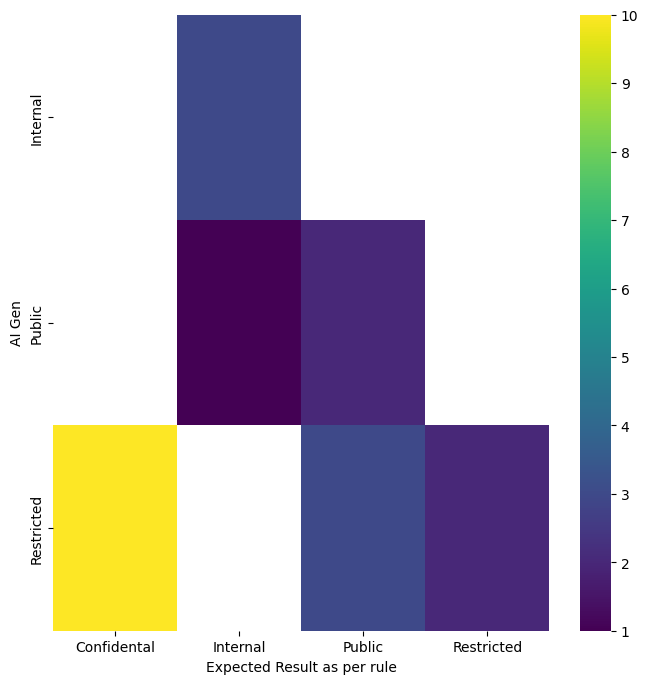

In [ ]:
# @title Expected Result as per rule vs AI Gen

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['AI Gen'].value_counts()
    for x_label, grp in df.groupby('Expected Result as per rule')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Expected Result as per rule')
_ = plt.ylabel('AI Gen')

In [ ]:
df.to_csv('/content/results.csv')